# Credit Risk Modelling
Credit risk refers to the risk of loss faced by financial institutions or lenders due to the possibility that a borrower may fail to repay their debt. It is one of the major risks in lending or investing, as lenders or investors may be exposed to the risk of not recovering the principal or receiving the interest payments.

I will be conducting credit risk modeling using the Lending Club dataset. Lending Club is a US-based peer-to-peer (P2P) lending company that matches investors with borrowers. Investors invest their funds through Lending Club, and these funds are then loaned to borrowers. When the borrower repays the loan, the principal and interest are returned to the investor. This creates a mutually beneficial scenario, where borrowers typically receive lower interest rates, and investors can achieve higher returns.

The dataset includes all available data for over 800,000 consumer loans issued by Lending Club between 2007 and 2015. It contains the current loan status ("loan_status") and the most recent payment information. Key features (variables) in the dataset include the number of financial inquiries ("inq_fi"), address information ("addr_state", "zip_code", etc.), and collection status ("collections"). The collections variable indicates whether the borrower has missed one or more payments and whether the team is actively trying to recover the funds.

In this project, we will calculate the Expected Loss (EL) to analyze credit risk. Expected Loss is derived by multiplying the following three key components: Probability of Default (PD), Loss Given Default (LGD), and Exposure at Default (EAD). Each of these factors will be modeled separately to provide a more accurate assessment of credit risk.

- PD (Probability of Default) model: This model will predict the probability of default, focusing on assessing the likelihood that a borrower will default on a loan.
- LGD (Loss Given Default) model: This model will estimate the actual loss rate in the event of a default, evaluating the extent of the loss when a loan defaults.
- EAD (Exposure at Default) model: This model will forecast the outstanding loan amount at the time of default, measuring the total balance remaining when a default occurs.

By modeling these components individually, we aim to provide a more detailed and precise evaluation of credit risk.

# Explore Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Load the data file
df_backup = pd.read_csv('loan_data_2007_2014.csv')

/Users/oliviachoi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Copy the data
df = df_backup.copy()

In [4]:
# Display first 5 records
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display columns name
df.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)

In [7]:
# Display data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# Preprocessing

## Continous Variables

In [8]:
# Object data type
# Display unique values in the 'emp_length' column to understand its current format
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
# Convert Object data to numeric
# Remove '+ years' from the 'emp_length' values
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')

/var/folders/7l/hzhbdmks3snf1lxq26d5wcbh0000gn/T/ipykernel_6436/3796932139.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


In [10]:
# Display unique values after the first replacement to check intermediate results
df['emp_length_int'].unique()

array(['10', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [11]:
# Replace '< 1 year' with '0'
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))

# Replace 'n/a' with '0'
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a', str(0))

# Remove ' years' from the values
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')

# Remove ' year' from the values
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

In [12]:
# Check the data type of the second element in the 'emp_length_int' column
type(df['emp_length_int'][1])

str

In [13]:
# Display unique values in the 'emp_length_int' column to verify final format
df['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [14]:
# Convert the 'emp_length_int' column to numeric type (integers)
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'])

In [15]:
# Display unique values in the 'emp_length_int' column after conversion to numeric
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [16]:
# Do the same thing for 'term'
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [17]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].str.replace(' ', '')

In [18]:
df['term_int'].unique()

array(['36', '60'], dtype=object)

In [19]:
df['term_int'] = pd.to_numeric(df['term_int'])

In [20]:
df['term_int'].unique()

array([36, 60])

In [21]:
df['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

The earliest credit line date refers to the date when a borrower first opened a line of credit, such as a credit card or loan. In credit risk analysis, this date is significant because the longer someone has maintained a credit line without defaults, the better it reflects on their creditworthiness. For instance, if a borrower has an earliest credit line date from many years ago, they may be seen as more reliable due to their longer history of managing credit.

In [22]:
# Object data type
# These are string variables but they are actually supposed to be date variables
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [23]:
# Convert 'earliest_cr_line' column from string format to datetime format using the pattern '%b-%y' (e.g., 'Jan-85'). 
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')

In [24]:
# Check the data type of the second element in the 'earliest_cr_line_date' column
type(df['earliest_cr_line_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
# We should set a reference date to calculate the time that has passed
# Subtract 'earliest_cr_line_date' from the reference date to calculate the duration since the earliest credit line
pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [26]:
# Calculate the number of months since the earliest credit line date
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [27]:
# Get a summary of statistics for the 'mths_since_earliest_cr_line' column
df['mths_since_earliest_cr_line'].describe()


count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

- Count: the number of entries
- Mean: average number of months since the earliest credit line
- Standard Deviation: measure of the variability in the number of months
- Minimum: -612 months which indicates possible data issues or errors => need further investigation!
- 25th Percentile: 25% of the values are below this point
- 50th Percentile (Median): 50% of the values are below this point
- 75th Percentile: 75% of the values are below this point
- Maximum: the largest number of months since the earliest credit line

In [28]:
# Display rows where 'mths_since_earliest_cr_line' is negative
df.loc[df['mths_since_earliest_cr_line'] < 0, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


When I converted the 'earliest_cr_line' column from string format to datetime format, the conversion did not work as expected. For example, 'Sep-62' was converted to 2062-09-01, whereas it should have been 1962-09-01. This issue aroce in the first place because the origin of the built-in time scale starts after 1970.

To resolve this, let's substitute the negative values with the maximum observed difference.

In [29]:
# Replace negative values in 'mths_since_earliest_cr_line' with the maximum value of the column
df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line'] < 0] = df['mths_since_earliest_cr_line'].max()

/var/folders/7l/hzhbdmks3snf1lxq26d5wcbh0000gn/T/ipykernel_6436/342213293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line'] < 0] = df['mths_since_earliest_cr_line'].max()


In [30]:
# Check if there are any remaining negative values in the 'mths_since_earliest_cr_line' column after imputation
min(df['mths_since_earliest_cr_line'])

73.0

In [31]:
# Do the same thing for issue_d

In [32]:
# Object data type
df['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [33]:
# Convert 'issue_d' column from string format to datetime format using the pattern '%b-%y' (e.g., 'Jan-85'). 
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [34]:
# Check the data type
type(df['issue_d_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
# Assume we are now in December 2017
# Calculate the number of months since the issue date
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [36]:
# Shows some descriptive statisics for the values of a column
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

## Discrete Variables

In [37]:
# View unique values in the 'grade' column
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [38]:
# Apply one-hot encoding to the 'grade' column
pd.get_dummies(df['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [39]:
# Select columns with categorical data types ('object' or 'category')
df.select_dtypes(include=['object', 'category']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [40]:
# Display unique values for each column to identify categorical variables
#for col in df.select_dtypes(include=['object', 'category']).columns:
#    unique_vals = df[col].unique()
#    print(f"{col}: {unique_vals}")

In [41]:
# Create one-hot encoded DataFrames for several categorical variables
df_dummies = [pd.get_dummies(df['grade'], prefix='grade', prefix_sep=':'),
              pd.get_dummies(df['sub_grade'], prefix='sub_grade', prefix_sep=':'),
              pd.get_dummies(df['home_ownership'], prefix='home_ownership', prefix_sep=':'),
              pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep=':'),
              pd.get_dummies(df['loan_status'], prefix='loan_status', prefix_sep=':'),
              pd.get_dummies(df['purpose'], prefix='purpose', prefix_sep=':'),
              pd.get_dummies(df['addr_state'], prefix='addr_state', prefix_sep=':'),
              pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
             ]

In [42]:
# Combine all the one-hot encoded DataFrames into a single DataFrame
df_dummies = pd.concat(df_dummies, axis = 1)

In [43]:
# Check the type of the df_dummies variable
type(df_dummies)

pandas.core.frame.DataFrame

In [44]:
# Combine the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, df_dummies], axis = 1)

In [45]:
# Get the column names of the DataFrame
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## Handling Missing Values

In [46]:
# Set the option to display all rows in the DataFrame output
pd.options.display.max_rows = None

# Display the count of missing values for each column
df.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [47]:
# Set the option to display up to 100 rows in the DataFrame output
pd.options.display.max_rows = 100

In [48]:
# Fill missing values in the 'total_rev_hi_lim' column with the corresponding values from the 'funded_amnt' column
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)

In [49]:
# Check the number of missing values in the 'total_rev_hi_lim' column
df['total_rev_hi_lim'].isnull().sum()

0

In [50]:
# Replace the missing values with the mean of the non-missing values of the variable
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

In [51]:
# Check the number of missing values
df['annual_inc'].isnull().sum()

0

In [52]:
# List of columns to replace missing values with zeros
columns_to_replace = ['mths_since_earliest_cr_line', 
                      'acc_now_delinq', 
                      'total_acc', 
                      'pub_rec', 
                      'open_acc', 
                      'inq_last_6mths', 
                      'delinq_2yrs', 
                      'emp_length_int']

In [53]:
# Replace missing values with zeros for the specified columns
df[columns_to_replace] = df[columns_to_replace].fillna(0)

In [54]:
# Check the number of missing values
df[columns_to_replace].isnull().sum()

mths_since_earliest_cr_line    0
acc_now_delinq                 0
total_acc                      0
pub_rec                        0
open_acc                       0
inq_last_6mths                 0
delinq_2yrs                    0
emp_length_int                 0
dtype: int64

# PD Model

## Data Preparation

The dependent variable for our Probability of Default (PD) model is the loan status, which includes several categories indicating the state of the loan. We first check the unique values in the 'loan_status' column to understand its categories and their distributions.

In [55]:
# Dependent variable of PD model = indicator for default/non-default
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [56]:
# Count of each loan status category
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [57]:
# Proportion of each loan status category
df['loan_status'].value_counts() / df['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

## Dependent Variable

In [58]:
# Creating a binary target variable 'good_bad' for the PD model.
# We classify loans as 'bad' (0) if they are 'Charged Off', 'Default', 
# 'Does not meet the credit policy. Status:Charged Off', or 'Late (31-120 days)'.
# Otherwise, they are classified as 'good' (1).
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 
                                                  'Default',
                                                  'Does not meet the credit policy. Status:Charged Off',
                                                  'Late (31-120 days)'
                                                 ]), 0, 1)

In [59]:
# Checking the distribution of the binary 'good_bad' variable
df['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

## Splitting Data

In [60]:
# Overfitting: our statistical model has focused on a particular dataset so much that it has missed the point
# Underfitting:  the model fails to capture the underlying logic of the data

# Split data into train and test
# 10% test 90% train or 20% test 80% train
# model never see the test dataset 

from sklearn.model_selection import train_test_split

In [61]:
# train_test_split(df.drop('good_bad', axis = 1), df['good_bad'])
# the output is 4 arrays:
# train dataset with inputs
# test dataset with inputs
# train dataset with targets
# test dataset with targets

In [62]:
df_inputs_train, df_inputs_test, df_target_train, df_target_test = train_test_split(df.drop('good_bad', axis = 1), df['good_bad'], test_size = 0.2, random_state = 42)

In [63]:
df_inputs_train.shape

(373028, 206)

In [64]:
df_target_train.shape

(373028,)

In [65]:
df_inputs_test.shape

(93257, 206)

In [66]:
df_target_test.shape

(93257,)

## Independant Variables

In [67]:
# Fine-classing: turning continous variables into categories
# Both discrete and contionus variables can be represented with categories

# Weight of evidence: to what extent an independent variable would predict a dependent variable
# Information value: how much information the original independent variable brings with respect to explaining the dependent variable

# Course classing: the process of constructing new categories based on the initial ones

### Example

In [68]:
df_inputs_prepr = df_inputs_train
df_targets_prepr = df_target_train

In [69]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [70]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

# A = Highest credit worthiness
# D = Lowest credit worthiness

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [71]:
df1.columns.values[0]

'grade'

In [72]:
df1.columns.values[1]

'good_bad'

In [73]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [74]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [75]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [76]:
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [77]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [78]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [79]:
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [80]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [81]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [82]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']

In [83]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [84]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [85]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [86]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [87]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [88]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


In [89]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Preprocessing Discrete Variables

In [90]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [91]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

In [92]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [94]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

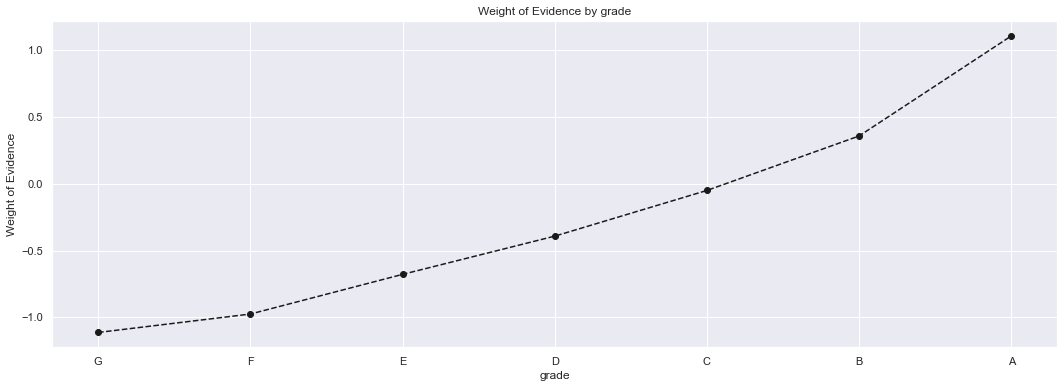

In [95]:
plot_by_woe(df_temp)

In [96]:
# reference category = G

In [97]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


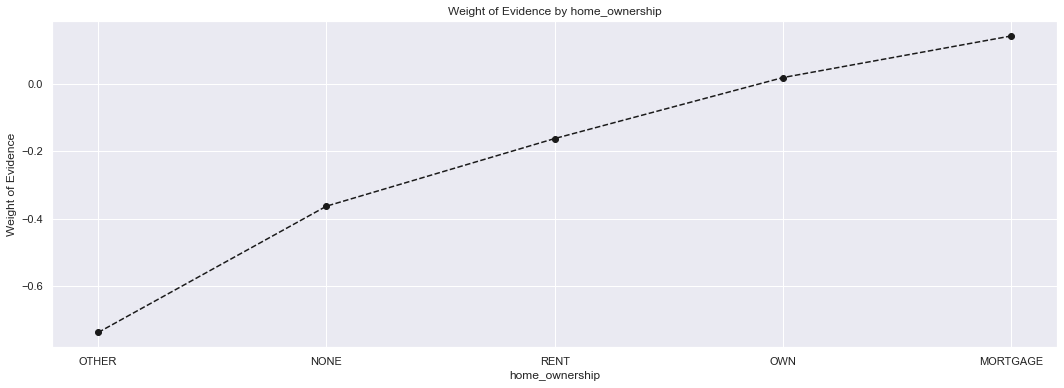

In [98]:
plot_by_woe(df_temp)

In [99]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

In [100]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [101]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)

In [102]:
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


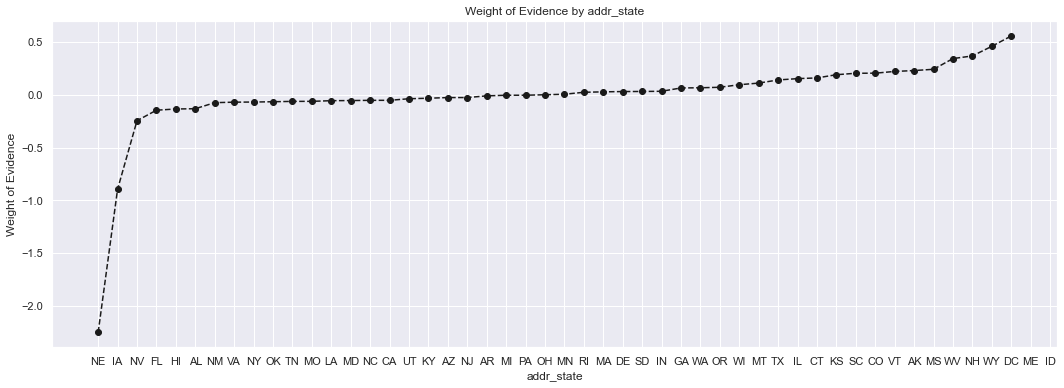

In [103]:
plot_by_woe(df_temp)

In [104]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

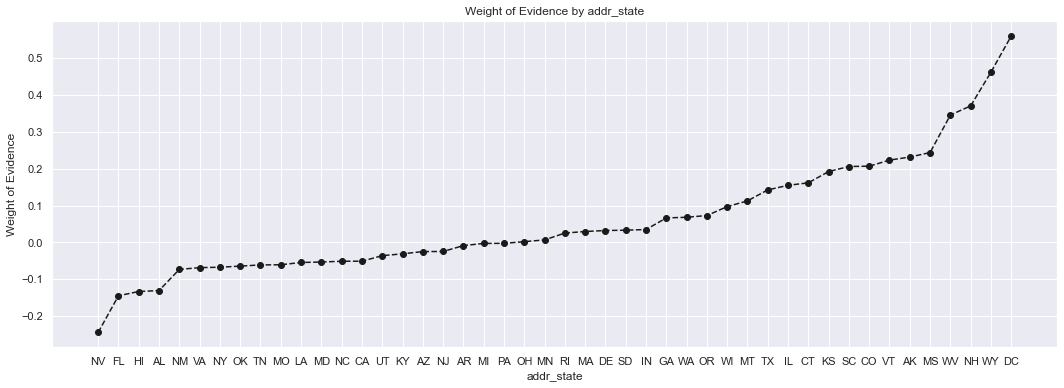

In [105]:
plot_by_woe(df_temp.iloc[2:-2,:])

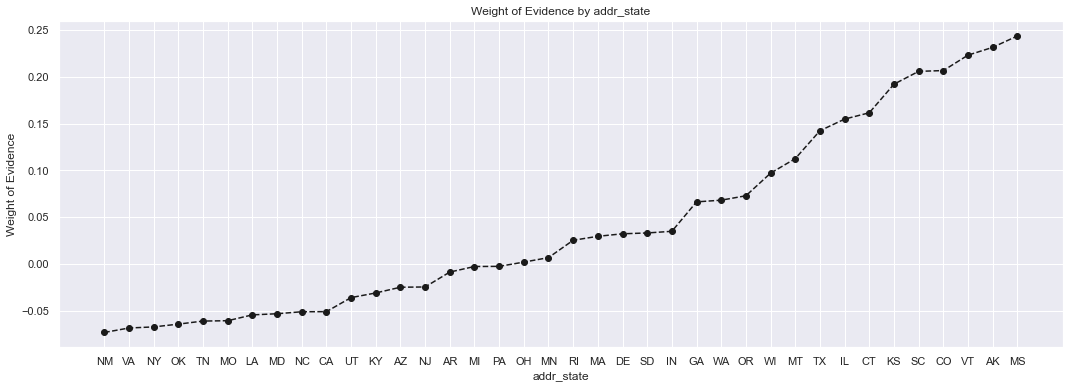

In [106]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [107]:
df_inputs_prepr['addr_state:ND']

427211    0
206088    0
136020    0
412305    0
36159     0
         ..
259178    0
365838    0
131932    0
146867    0
121958    0
Name: addr_state:ND, Length: 373028, dtype: int64

In [108]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [109]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


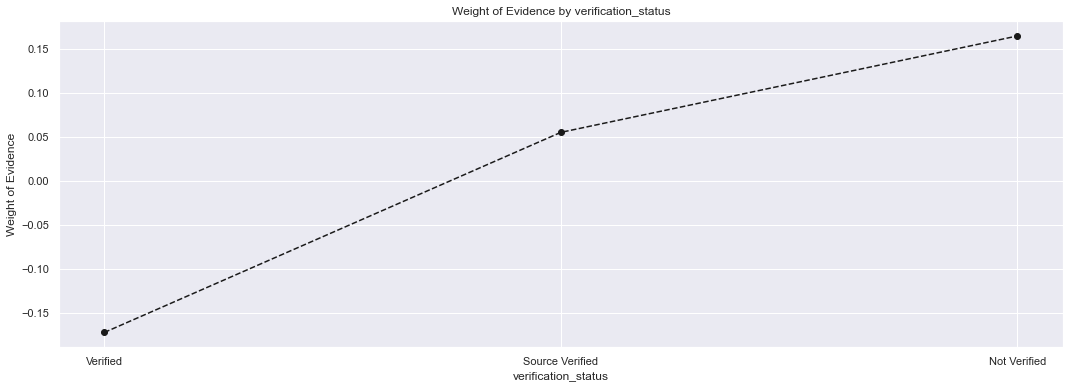

In [110]:
plot_by_woe(df_temp)

In [111]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


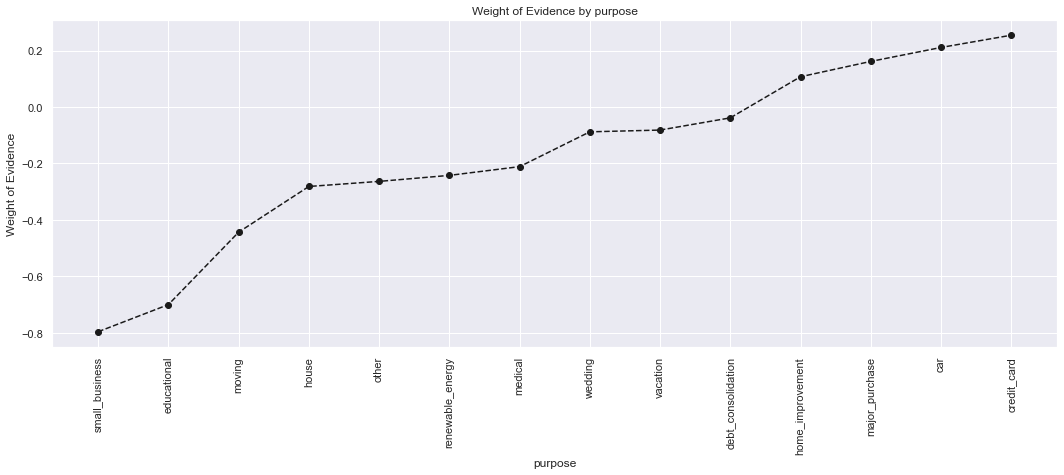

In [112]:
plot_by_woe(df_temp, 90)

In [113]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [114]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


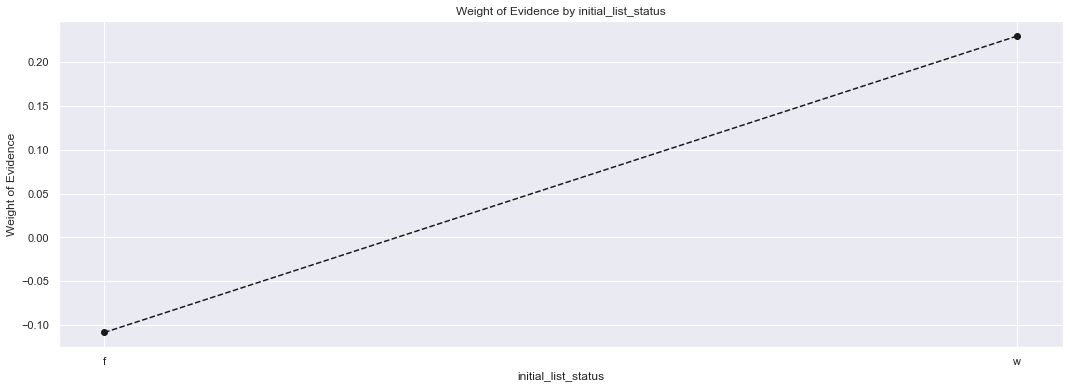

In [115]:
plot_by_woe(df_temp)

### Preprocessing Continous Variables